# Predicting heart disease using machine learning
This notebook looks into using many Python-based and data science libraries in an attempt to build a machine learning model to predict heart disease. In order to run successfully the program, the following command needs to be run for having the proper env: `conda env create --prefix ./env -f environment.yml`
The following approach will be taken:
1. Problem definition
2. Data
3. Evaluaiton
4. Features
5. Modelling
6. Experimentaiton

## 1. Problem Definition
Given a clinical dataset, can we predict if someone has heart disease?


## 2. Data
* Column Descriptions:
* Id (Unique id for each patient)
* Age (Age of the patient in years)
* Origin (place of study)
* Sex (Male/Female)
* Cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* Trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* Chol (serum cholesterol in mg/dl)
* Fbs (if fasting blood sugar > 120 mg/dl)
* Restecg (resting electrocardiographic results)
* -- Values: [normal, stt abnormality, lv hypertrophy]
* Thalach: maximum heart rate achieved
* Exang: exercise-induced angina (True/ False)
* Oldpeak: ST depression induced by exercise relative to rest
* Slope: the slope of the peak exercise ST segment
* Ca: number of major vessels (0-3) colored by fluoroscopy
* Thal: [normal; fixed defect; reversible defect]
* Num: the predicted attribute

The original data comes from Kaggle: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data


## 3. Evaluation
Checking is the accuracy of prediction can reach to 95%


## 4. Features
Creating a data dictionary


In [9]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [11]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [14]:
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
df.shape  # raws and columns

(303, 14)

In [17]:
# Data exploration
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [18]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [21]:
#number of classes
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

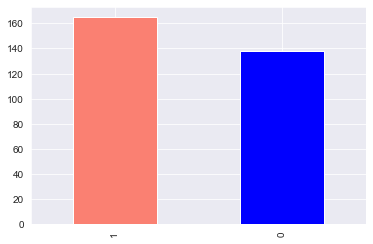

In [23]:
df.target.value_counts().plot(kind="bar", color=["salmon","blue"])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [26]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [27]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Diseae frequence accorning to Sex

In [31]:
df.sex.value_counts()
# Sex: 1 male, 0 female

1    207
0     96
Name: sex, dtype: int64

In [32]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

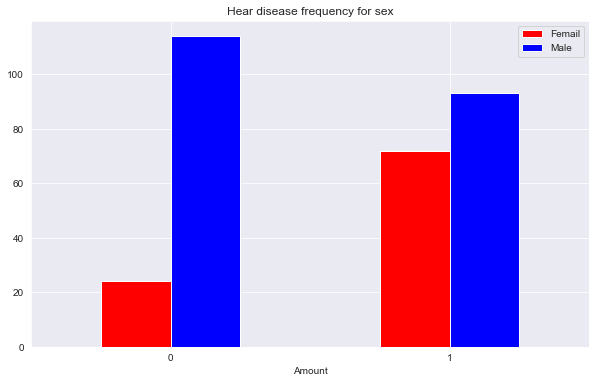

In [35]:
 # create a plot of cross tab
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6),color=["red", "blue"])
plt.title("Hear disease frequency for sex")
plt.xlabel(" 0 No disease, 1 Disease")
plt.xlabel("Amount")
plt.legend(["Femail", "Male"])
plt.xticks(rotation=0 )